In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
import sklearn.gaussian_process as gp
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import ShuffleSplit, KFold, GridSearchCV, train_test_split

import sys, os
sys.dont_write_bytecode = True

import conditions, analysis

import random
random.seed(1107)
np.random.seed(1107)

import warnings
warnings.filterwarnings('ignore')

PATH = 'Output_Figures'
os.makedirs(PATH, exist_ok=True)

PATH2 = 'Output_CSV'
os.makedirs(PATH2, exist_ok=True)

In [2]:
condition = conditions.calc_condition()
Reaction = condition['Reaction']
data_sheet_name = condition['data_sheet_name']
date, pgm_model, add_model, supp_model = condition['date'], condition['pgm_model'], condition['add_model'], condition['supp_model']
converted = analysis.analysis_data_convert(condition, data_sheet_name, use_models=[pgm_model, add_model, supp_model], idx=None)
data, add_desc, feat, target = converted['data'], converted['add_desc'], converted['feat'], converted['target']

feat, target = converted['feat'], converted['target']
feat.columns

20220318 rwgs_250 all data


Index(['Group', 'EN_Allred', 'm.p.', 'd_fus_H', 'Density', 'BG_Oxide',
       'Ox Num_Oxide', 'Eads_CO2'],
      dtype='object')

In [3]:
MODEL_TYPES = [f'prop{add_model}']
errors = {}
cvf = ShuffleSplit(n_splits = 100, random_state = 1107, test_size = 0.2)
log_param1 = [1e-2, 1e-1, 1.0, 10, 1e2]
log_param2 = [1.0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
log_param3 = [1.0, 10, 1e2, 1e3, 1e4, 1e5]

print('Lasso', f'prop{add_model}')
cvmodel = GridSearchCV(Lasso(),
                        param_grid = {'alpha': log_param1},
                        n_jobs = -1)
errors['Lasso'] = analysis.crossvalid(feat, target, cvmodel, cvf)

print('Ridge', f'prop{add_model}')
cvmodel = GridSearchCV(Ridge(),
                        param_grid = {'alpha': log_param1},
                        n_jobs = -1)
errors['Ridge'] = analysis.crossvalid(feat, target, cvmodel, cvf)

print('GPR', f'prop{add_model}')
kernel = gp.kernels.Matern(nu = 2.5)
cvmodel = GridSearchCV(gp.GaussianProcessRegressor(kernel = kernel,
                                                    normalize_y = True,
                                                    n_restarts_optimizer = 10,
                                                    random_state = 1107),
                        param_grid = {'alpha':log_param2},
                        n_jobs = -1)
errors['GPR'] = analysis.crossvalid(feat, target, cvmodel, cvf)

print('SVR', f'prop{add_model}')
cvmodel = GridSearchCV(SVR(kernel = 'rbf'),
                        param_grid = {'C': log_param3,
                                        'gamma':log_param2,
                                        'epsilon':log_param1},
                        n_jobs = -1)
errors['SVR'] = analysis.crossvalid(feat, target, cvmodel, cvf)

print('RFR', f'prop{add_model}')
#model = opt_RFR(n_estimators = 100, random_state = 1107, n_jobs = 4)

cvmodel = GridSearchCV(RandomForestRegressor(n_jobs = -1, random_state = 1107),
                        param_grid = {'n_estimators':[100, 250, 500]},
                        n_jobs = -1)

errors['RFR'] = analysis.crossvalid(feat, target, cvmodel, cvf)

print('ETR', f'prop{add_model}')
#model = opt_ETR(n_estimators = 100, random_state = 1107, n_jobs = 4)

cvmodel = GridSearchCV(ExtraTreesRegressor(n_jobs = -1, random_state = 1107),
                        param_grid = {'n_estimators':[100, 250, 500]},
                        n_jobs = -1)

errors['ETR'] = analysis.crossvalid(feat, target, cvmodel, cvf)

"""
print('XGB', f'prop{pgm_model}{add_model}{supp_model}')
cvmodel = GridSearchCV(XGBRegressor(n_jobs = -1, random_state = 1107),
                        param_grid = {'n_estimators':[100, 250, 500]},
                        n_jobs = -1)
errors['XGB_{}'.format(f'prop{pgm_model}{add_model}{supp_model}')] = analysis.crossvalid(feat, target, cvmodel, cvf)
"""


Lasso prop2
Train ... RMSE: 0.762, MSE: 0.582, MAE: 0.618, R2: 0.336, RMSE detail (sd: 0.031, min:0.718, max:0.866)
Test ... RMSE: 0.832, MSE: 0.704, MAE: 0.651, R2: 0.185, RMSE detail (sd: 0.104, min:0.627, max:1.124)
Ridge prop2
Train ... RMSE: 0.739, MSE: 0.547, MAE: 0.595, R2: 0.376, RMSE detail (sd: 0.034, min:0.663, max:0.851)
Test ... RMSE: 0.829, MSE: 0.702, MAE: 0.633, R2: 0.185, RMSE detail (sd: 0.120, min:0.614, max:1.432)
GPR prop2
Train ... RMSE: 0.656, MSE: 0.431, MAE: 0.505, R2: 0.508, RMSE detail (sd: 0.019, min:0.606, max:0.691)
Test ... RMSE: 0.731, MSE: 0.541, MAE: 0.563, R2: 0.378, RMSE detail (sd: 0.078, min:0.547, max:0.952)
SVR prop2
Train ... RMSE: 0.563, MSE: 0.324, MAE: 0.444, R2: 0.631, RMSE detail (sd: 0.083, min:0.372, max:0.661)
Test ... RMSE: 0.734, MSE: 0.590, MAE: 0.556, R2: 0.315, RMSE detail (sd: 0.225, min:0.557, max:2.290)
RFR prop2
Train ... RMSE: 0.164, MSE: 0.027, MAE: 0.133, R2: 0.969, RMSE detail (sd: 0.004, min:0.149, max:0.174)
Test ... RMSE:

"\nprint('XGB', f'prop{pgm_model}{add_model}{supp_model}')\ncvmodel = GridSearchCV(XGBRegressor(n_jobs = -1, random_state = 1107),\n                        param_grid = {'n_estimators':[100, 250, 500]},\n                        n_jobs = -1)\nerrors['XGB_{}'.format(f'prop{pgm_model}{add_model}{supp_model}')] = analysis.crossvalid(feat, target, cvmodel, cvf)\n"

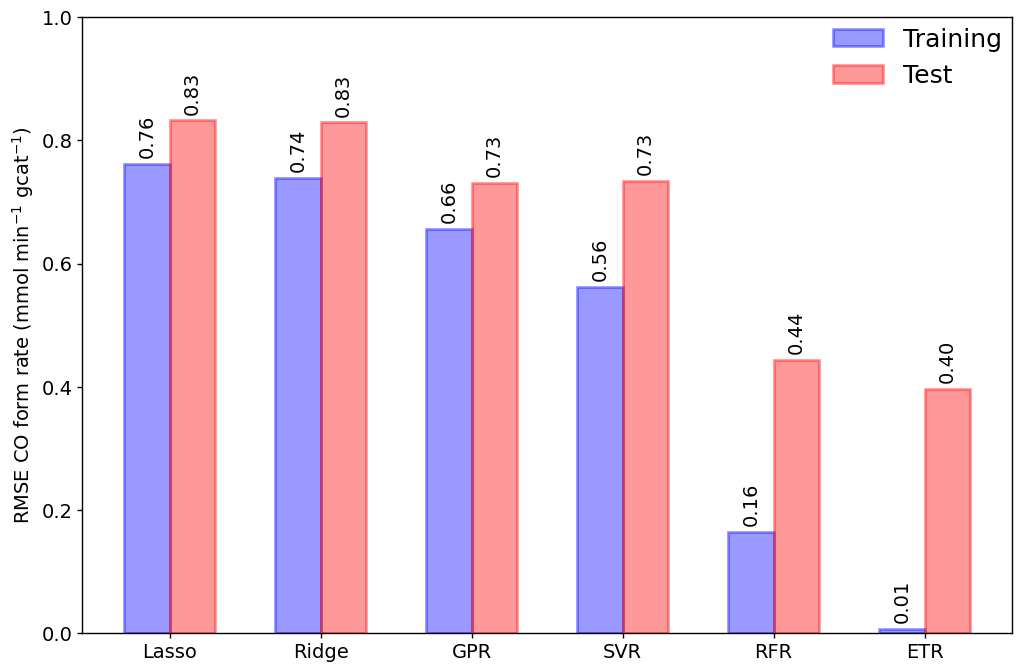

In [8]:
methods = ['Lasso', 'Ridge', 'GPR', 'SVR', 'RFR', 'ETR']
use_method = ['{}'.format(m) for m in methods ]

mean_trn = [errors[m]['trn_rmse'] for m in use_method]
mean_tes = [errors[m]['tes_rmse'] for m in use_method]

width =0.3
plt.figure(facecolor='white', figsize=(12,8))
ind = np.arange(len(methods))
plt.bar(ind, mean_trn, width, color='blue', alpha=0.4, edgecolor='blue', linewidth=2, label = 'Training')
plt.bar(ind+width, mean_tes, width, color='red', alpha=0.4, edgecolor='red', linewidth=2, label = 'Test')

for x,y in zip(ind, mean_trn):
    plt.text(x, y+0.01, '%.2f' % y, ha='center', va= 'bottom', rotation=90, fontsize=14)

for x,y in zip(ind, mean_tes):
    plt.text(x+ width, y+0.01, '%.2f' % y, ha='center', va= 'bottom', rotation=90, fontsize=14)

plt.xticks(ind+(width*0.5), methods, fontsize=14)
#plt.tick_params(length=0)
plt.yticks(fontsize=14)
plt.ylabel('RMSE CO form rate (mmol $min^{{-}1}$ $gcat^{{-}1}$)', fontsize=14)
#plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10)
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18, frameon=False)
plt.ylim(0, 1)
plt.savefig(f'{PATH}/{date}_{Reaction}_ML_methods_prop{add_model}_RMSE_v2.png', dpi=600, bbox_inches='tight')

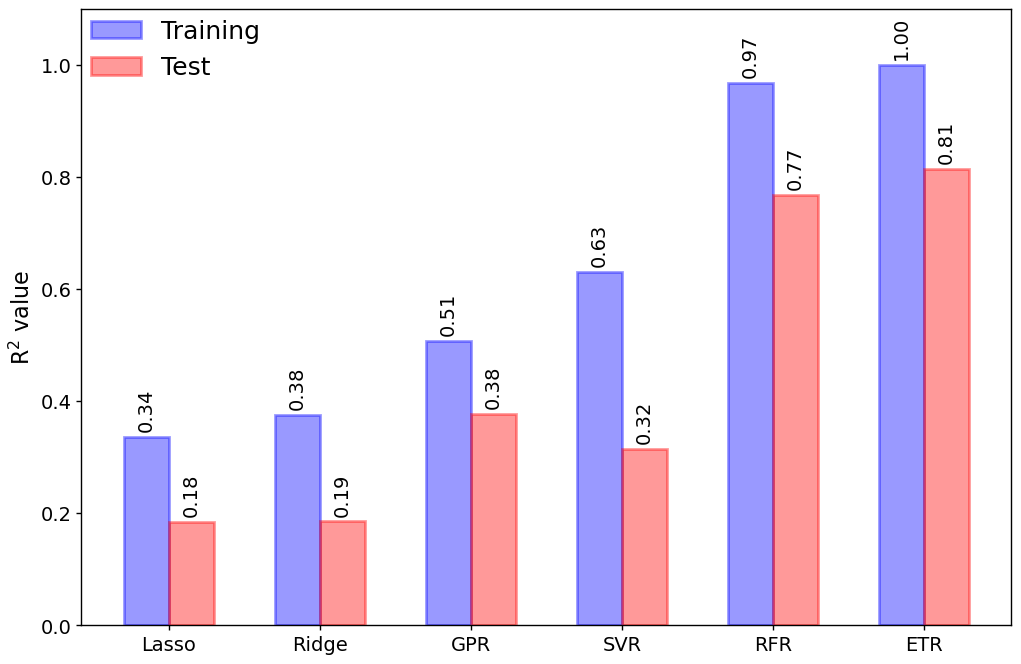

In [9]:
methods = ['Lasso', 'Ridge', 'GPR', 'SVR', 'RFR', 'ETR']
use_method = ['{}'.format(m) for m in methods ]

r2_trn = [errors[m]['trn_r2'] for m in use_method]
r2_tes = [errors[m]['tes_r2'] for m in use_method]

width =0.3
plt.figure(facecolor='white', figsize=(12,8))
ind = np.arange(len(methods))
plt.bar(ind, r2_trn, width, color='blue', alpha=0.4, edgecolor='blue', linewidth=2, label = 'Training')
plt.bar(ind+width, r2_tes, width, color='red', alpha=0.4, edgecolor='red', linewidth=2, label = 'Test')

for x,y in zip(ind, r2_trn):
    plt.text(x, y+0.01, '%.2f' % y, ha='center', va= 'bottom', rotation=90, fontsize=14)

for x,y in zip(ind, r2_tes):
    plt.text(x+ width, y+0.01, '%.2f' % y, ha='center', va= 'bottom', rotation=90, fontsize=14)

plt.xticks(ind+(width*0.5), methods, fontsize=14)
#plt.tick_params(length=0)
plt.yticks(fontsize=14)
plt.ylabel('$R^{2}$ value', fontsize=16)
#plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10)
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0, fontsize=18, frameon=False)
plt.ylim(0, 1.1)
plt.savefig(f'{PATH}/{date}_{Reaction}_ML_methods_prop{add_model}_R2_v2.png', dpi=600, bbox_inches='tight')

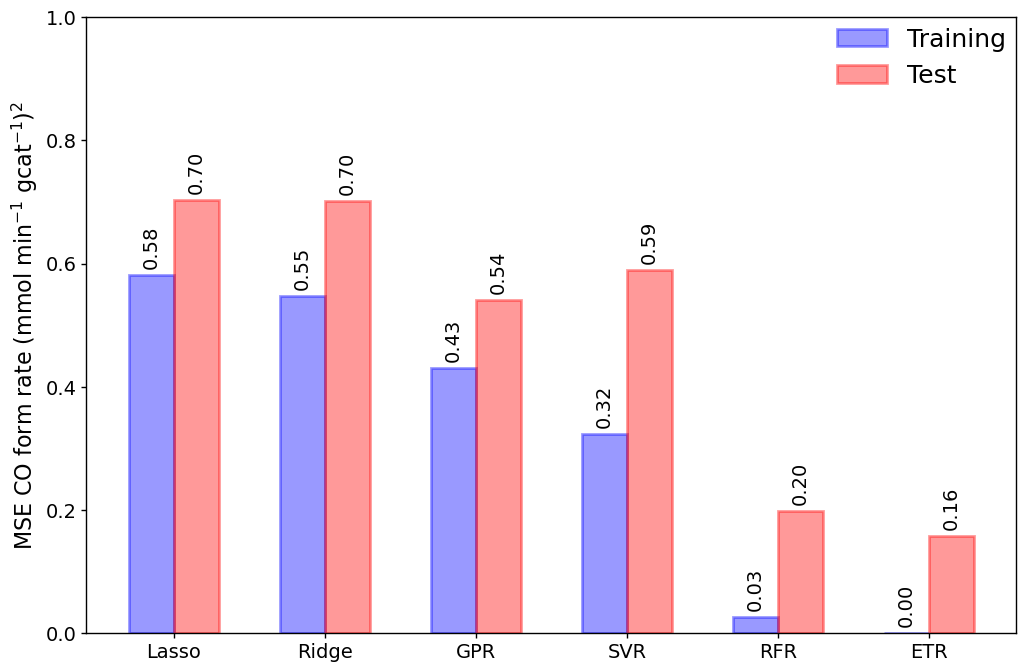

In [10]:
methods = ['Lasso', 'Ridge', 'GPR', 'SVR', 'RFR', 'ETR']
use_method = ['{}'.format(m) for m in methods ]

r2_trn = [errors[m]['trn_mse'] for m in use_method]
r2_tes = [errors[m]['tes_mse'] for m in use_method]

width = 0.3
plt.figure(facecolor='white', figsize=(12,8))
ind = np.arange(len(methods))
plt.bar(ind, r2_trn, width, color='blue', alpha=0.4, edgecolor='blue', linewidth=2, label = 'Training')
plt.bar(ind+width, r2_tes, width, color='red', alpha=0.4, edgecolor='red', linewidth=2, label = 'Test')

for x,y in zip(ind, r2_trn):
    plt.text(x, y+0.01, '%.2f' % y, ha='center', va= 'bottom', rotation=90, fontsize=14)

for x,y in zip(ind, r2_tes):
    plt.text(x+ width, y+0.01, '%.2f' % y, ha='center', va= 'bottom', rotation=90, fontsize=14)

plt.xticks(ind+(width*0.5), methods, fontsize=14)
#plt.tick_params(length=0)
plt.yticks(fontsize=14)
plt.ylabel('MSE CO form rate (mmol $min^{{-}1}$ $gcat^{{-}1}$)$^{2}$', fontsize=16)
#plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10)
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18, frameon=False)
plt.ylim(0, 1)
plt.savefig(f'{PATH}/{date}_{Reaction}_ML_methods_prop{add_model}_MSE_v2.png', dpi=600, bbox_inches='tight')

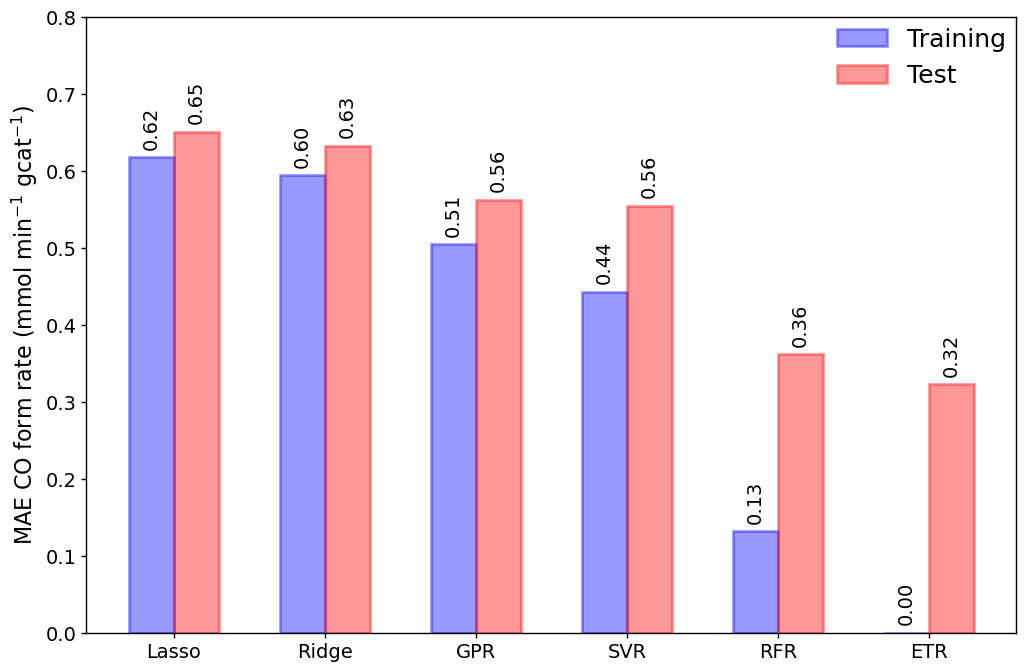

In [11]:
methods = ['Lasso', 'Ridge', 'GPR', 'SVR', 'RFR', 'ETR']
use_method = ['{}'.format(m) for m in methods ]

r2_trn = [errors[m]['trn_mae'] for m in use_method]
r2_tes = [errors[m]['tes_mae'] for m in use_method]

width = 0.3
plt.figure(facecolor='white', figsize=(12,8))
ind = np.arange(len(methods))
plt.bar(ind, r2_trn, width, color='blue', alpha=0.4, edgecolor='blue', linewidth=2, label = 'Training')
plt.bar(ind+width, r2_tes, width, color='red', alpha=0.4, edgecolor='red', linewidth=2, label = 'Test')

for x,y in zip(ind, r2_trn):
    plt.text(x, y+0.01, '%.2f' % y, ha='center', va= 'bottom', rotation=90, fontsize=14)

for x,y in zip(ind, r2_tes):
    plt.text(x+ width, y+0.01, '%.2f' % y, ha='center', va= 'bottom', rotation=90, fontsize=14)

plt.xticks(ind+(width*0.5), methods, fontsize=14)
#plt.tick_params(length=0)
plt.yticks(fontsize=14)
plt.ylabel('MAE CO form rate (mmol $min^{{-}1}$ $gcat^{{-}1}$)', fontsize=16)
#plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10)
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18, frameon=False)
plt.ylim(0, 0.8)
plt.savefig(f'{PATH}/{date}_{Reaction}_ML_methods_prop{add_model}_MAE_v2.png', dpi=600, bbox_inches='tight')